In [10]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import sqrt 
from scipy.stats import chi2
from scipy.stats import norm

import matplotlib.pyplot as plt

# Introducción

Puede ser útil tene un límite superior e inferior en los datos. Estos límites puede ser usados para ayudarnos a identificar anomalías y un conjunto de expectativas. Un límite en observaciones de una población es llamado intervalo de tolerancia. Un intervalo de tolerancia es diferente a un intervalo de predicción que cuantifica la incertidumbre de un valor predicho. También es diferente a un intervalo de confianza que cuantifica la incertidumbre del parámetro de una población, por ejemplo, la media. Un intervalo de tolerancia cubre una proporción de la distribución de la población.

# Límites en Datos

Es útil poner límite en los datos. Por ejemplo, si tenemos una muestra de datos en un dominio, si conocemos el límite superior e inferior de los valores nominales puede ser útil para identificar anomalías o outliers en los datos. Para un proceso o modelo que está haciendo predicciones, puede ser de gran ayuda conocer el rango de predicciones sensatas que podemos esperar. Conocer el rango común de valores puede ayudarnos a fijar expectativas y detectar anomalías. El rango común de valores para los datos es llamado intervalo de tolerancia.

# ¿Qué son los intervalos de tolerancia?

El intervalo de tolerancia es un límite de la estimación de la proporción de datos de una población. El intervalo es limitado por el **"sampling error"** y por la varianza de la distribución de la población. Según la regla de los números grandes, conforme el tamaño de la muestra es incrementado, la probabilidad de coincidir con la población subyacente será mayor. Si los datos tienen una distribución Gaussiana, el intervalo puede ser expresado en el contexto de valor medio, por ejemplo:

**x+/-y cubre el 95% de los datos con una confianza del 90%.**

Un intervalo de tolerancia es definido en términos de dos cantidades:

* **Coverage:** proporción de la población cubierta por el intervalo.

* **Confidence:** confianza probabilística que el intervalo cubre en proporción a la población.

El intervalo de confianza es construido a partir de datos usando dos coeficientes: coverage y el coeficiente de tolerancia. La cobertura(coverage) es la proporción de la población que el intervalo supuestamente debe contener. El coeficiente de tolerancia es el grado de confianza con el que el intervalo alcanza la cobertura especificada. Un intervalo de tolerancia con una cobertura del 95% y un coeficiente de tolerancia del 90% contendrá el 95% de la distribución de la población con una confianza del 90%.

# Como calcular los intervalos de tolerancia

El tamaño de un intervalo de tolerancia es proporcional al tamaño de la muestra de la población y la varianza de la población. Hay dos métodos principales para calcular los intervalos de tolerancia dependiendo de la distribución de los datos: métodos paramétricos y no paramétricos.

* **Intervalos de tolerancia paramétricos:** usar el conocimiento de la distribución de la población para especificar la cobertura y confianza. A menudo se utiliza para referirse a distribuciones gaussianas.

* **Intervalos de tolerancia no paramétricos:** hacen uso de estadísticos de tipo rank para estimar la cobertura y la confianza, a menudo tienen una menor precisión (intervalos más amplios) debido a la falta de información sobre la distribución.

Los intervalos de tolerancia son relativamente sencillos de calcular para una muestra de observaciones independientes extraídas de una distribución Gaussiana.

# Intervalos de tolerancia para una distribución Gaussianna

A continuación vamos a proceder a mostrar mediante un ejemplo la forma de calcular los intervalos de tolerancia de una muestra de datos. Crearemos una muestra de 100 observaciones extraídas de una distribución Gaussianna y con una media de 50 y un desviación estándar de  5. Durante este ejemplo asumiremos que desconocemos estos dos parámetros ya que lo que queremos hacer es estimar estos dos parámetros. 

Lo siguiente que debemos de especificar son los grados de libertad, ya que serán usados en el cálculo de los valores críticos y en el cálculo del intervalo. Específicamente son usados para la estimación de la desviación estándar. Puesto que tenemos un total de 100 observaciones tenemos un total de 100 grados de libertad, puesto que a la hora de realizar el cálculo de la desviación estándar hacemos uso de la media, debemos de restar una unidad a los grados de libertad.

Ahora necesitamos especificar el nivel de cobertura de los datos. En este ejemplo estamos interesados en el 95%. La proporción es 95. Debemos mover esta proporción al percentil 97.5 para cubrir el 95%.

Tras esto necesitamos calcular la confianza de la cobertura. Podemos hacer esto recuperando el valor crítico de la distribución Chi-Squared dado un determinado número de grados de libertad y la probabilidad deseada.

Tras realizar esto podemos aplicar la fórmula para calcular los intervalos de tolerancia

$$interval = \sqrt{\frac{dof(1+\frac{1}{n})*gauss\_critical^2}{chi\_critical}}$$

Donde tenemos que **dof** es el número de grados de libertad, **n** es el tamaño de la muestra, **gauss_critical**  es el valor crítica de la distribución gaussianna, para cubri el 95% de la muestra y **chi_critical** es el valor crítica de la distribución Chi-Squared para la confianza deseada.

In [8]:
#Fijamos la semilla
seed(1)

#Generamos el dataset
data = 5*randn(100) + 50

#Especificamos los grados de libertad
n = len(data)
dof = n-1

#Especificamos la cobertura
prop = 0.95
prop_inv = (1 - prop) / 2
gauss_critical = norm.ppf(prop_inv)
print('Gaussian critical value: %.3f (coverage=%d%%)' % (gauss_critical, prop*100))
#Especificamos la confianza
prob = 0.99
prop_inv = 1-prob
chi_critical = chi2.ppf(prop_inv, dof)
print('Chi-Squared critical value: %.3f (prob=%d%%, dof =%d)' % (chi_critical, prob*100, dof))

#Tolerancia
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
print('Tolerance Interval: %.3f' % interval)

#Sumarizamos
data_mean = mean(data)
lower, upper = data_mean-interval, data_mean+interval
print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (lower, upper,
prop*100, prob*100))

Gaussian critical value: -1.960 (coverage=95%)
Chi-Squared critical value: 69.230 (prob=99%, dof =99)
Tolerance Interval: 2.355
47.95 to 52.66 covers 95% of data with a confidence of 99%


También podemos demostrar como el intervalo de tolerancia drecrece a medida que aumentamos el número de muestras. 

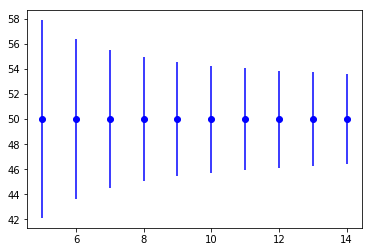

In [13]:
#Fijamos la semilla
seed(1)

#Nos creamos diferentes tamaños muestrales
sizes = range(5,15)

for n in sizes:
    #Generamos nuestro conjunto de muestras
    data = 5*randn(n) + 50
    #Generamos el número de grados de libertad
    dof = n-1
    #Especificamos la cobertura
    prop = 0.95
    prop_inv = (1.0 - prop)/2.0
    gauss_critical = norm.ppf(prop_inv)
    #Especificamos la confianza
    prob = 0.99
    prop_inv = 1-prob
    chi_critical = chi2.ppf(prop_inv, dof)
    #Obtenemos la tolerancia
    tol = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
    #Hacemos el plot
    plt.errorbar(n, 50, yerr=tol, color= 'blue' , fmt= 'o')

#Mostramos los resultados 
plt.show()